# About

**STUDENT INFO:**

*   Name: **Madina** Kumabayeva
*   e-mail: Madina_Kumabayeva@iscte-iul.pt
*   Erasmus+ exchange student

**CLASS:** Computing for Business and Economics

**PROJECT:** Analysis on YCombinator Companies and Founders

**dataset:** [Complete YCombinator Dataset from 2005-2024](https://www.kaggle.com/datasets/supremesun/complete-ycombinator-dataset-from-2005-2024)

# Introduction

Y Combinator is the best startup accelerator in the world. Startups have become a driving force of innovation and economic growth, with Y Combinator (YC) playing a pivotal role in shaping the global startup ecosystem. As one of the world’s most influential startup accelerators, YC has funded thousands of companies since its inception in 2005, launching industry leaders such as Airbnb, Dropbox, and Stripe. This project aims to conduct an exploratory data analysis (EDA) on the Complete Y Combinator Dataset (2005-2024) to uncover key insights into startup success, industry trends, and geographic distribution.

By leveraging Python, Pandas, and data visualization libraries, this analysis will explore fundamental questions, such as:

*   What percentage of YC startups remain active, get acquired, or shut down?
*   How has the number of YC-funded startups evolved over time?
*   Which industries dominate YC funding, and how do they shift over the years?
*   Does team size correlate with a startup’s success or failure?
*   Where are the majority of YC startups headquartered?

Through statistical analysis and visual storytelling, this project will provide a comprehensive overview of YC-backed startups, offering valuable insights for entrepreneurs, investors, and researchers interested in the dynamics of startup success.

**Loading the Y Combinator Dataset from Google Drive**

In this section, we will load the dataset into Google Colab from Google Drive. Since Colab runs in a cloud environment, we need to mount Google Drive first to access files stored there. Follow the steps below to ensure the dataset is loaded correctly.

In [9]:
# connecting our Google Drive to this Colab notebook
from google.colab import drive
drive.mount('/content/drive')

# importing Pandas for data analysis
import pandas as pd

# path to the dataset in Google Drive
file_path = "/content/drive/My Drive/ISCTE Computing/yc_companies.csv"

# loading the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# preview the first few rows
df.head()

Mounted at /content/drive


,active_founders,batch,founded,industry,jobs,location,logo,long_description,name,region,short_description,status,tags,team_size,website
0,"Geffen Avraham,Onkar Singh",F24,2024.0,"Industrials,Aviation and Space",0,San Francisco,https://bookface-images.s3.amazonaws.com/small...,Bifrost Orbital is building the SSH for satell...,Bifrost Orbital,"San Francisco, CA, USA",24/7 and real-time connectivity for satellites,Active,"satellites,aerospace,telecommunications",0.0,https://bifrostorbital.com/
1,Josh Purtell,F24,2024.0,"B2B,Infrastructure",0,NaN,https://bookface-images.s3.amazonaws.com/small...,"You add a few decorators to your agent code, a...",Synth,NaN,We help AI agents learn from data.,Active,"artificial-intelligence,reinforcement-learning",1.0,https://www.usesynth.ai
2,"Collin Barnwell,Sabeek Pradhan",F24,2024.0,Government,0,San Francisco,https://bookface-images.s3.amazonaws.com/small...,Roundabout Technologies makes AI-powered traff...,Roundabout Technologies,"San Francisco, CA, USA",AI-powered traffic lights,Active,"govtech,computer-vision,transportation",2.0,https://roundabout.tech
3,"Huzaifa Sial,Ayush Tomar",F24,2024.0,"Healthcare,Healthcare IT",0,San Francisco,https://bookface-images.s3.amazonaws.com/small...,Helpcare builds AI Agents to take on coordinat...,Helpcare AI,"San Francisco, CA, USA",Helpcare gets more patient in the door with AI...,Active,"artificial-intelligence,health-tech,healthcare",NaN,https://helpcare.ai
4,Dexter Horthy,F24,2023.0,"B2B,Engineering, Product and Design",0,San Francisco,https://bookface-images.s3.amazonaws.com/small...,HumanLayer is an API and SDK that enables tool...,HumanLayer,"San Francisco, CA, USA",Human-in-the-Loop for AI Agents,Active,"developer-tools,generative-ai",1.0,https://humanlayer.dev


# Analysis

In this section, we will explore key trends and patterns in the Y Combinator (YC) startup ecosystem by analyzing various aspects of the dataset. The goal is to extract meaningful insights that provide a clearer picture of startup success, industry trends, and geographic distribution.    

To conduct these analyses, we will use Pandas for data aggregation and calculations, while Matplotlib and Seaborn will help generate visualizations such as bar charts, line graphs, and pie charts. By applying grouping and filtering techniques, we will segment data by industry, location, and funding batch. Throughout the process, we will not only present the results but also provide clear explanations and interpretations to make the findings more meaningful.  

With these questions defined, the next step is to begin exploring the dataset and uncovering key insights about YC-backed startups.

# Question 1: What percentage of YC startups are still active, acquired, or closed?

We analyse the the success and failure rates of Y Combinator (YC) startups. The `status` column in our dataset provides information about whether a startup is still active, has been acquired, or has shut down. Understanding the distribution of startup outcomes helps us gauge the overall success rate of YC-funded companies.

1.1. We are importing the required libraries for data handling and visualization


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.2. Connecting our Google Drive to this Colab notebook & Showing the path to the dataset in Google Drive


In [11]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/ISCTE Computing/yc_companies.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.3. Loading the dataset into a Pandas DataFrame & Making a preview the first few rows

In [12]:
df = pd.read_csv(file_path)
df.head()

,active_founders,batch,founded,industry,jobs,location,logo,long_description,name,region,short_description,status,tags,team_size,website
0,"Geffen Avraham,Onkar Singh",F24,2024.0,"Industrials,Aviation and Space",0,San Francisco,https://bookface-images.s3.amazonaws.com/small...,Bifrost Orbital is building the SSH for satell...,Bifrost Orbital,"San Francisco, CA, USA",24/7 and real-time connectivity for satellites,Active,"satellites,aerospace,telecommunications",0.0,https://bifrostorbital.com/
1,Josh Purtell,F24,2024.0,"B2B,Infrastructure",0,NaN,https://bookface-images.s3.amazonaws.com/small...,"You add a few decorators to your agent code, a...",Synth,NaN,We help AI agents learn from data.,Active,"artificial-intelligence,reinforcement-learning",1.0,https://www.usesynth.ai
2,"Collin Barnwell,Sabeek Pradhan",F24,2024.0,Government,0,San Francisco,https://bookface-images.s3.amazonaws.com/small...,Roundabout Technologies makes AI-powered traff...,Roundabout Technologies,"San Francisco, CA, USA",AI-powered traffic lights,Active,"govtech,computer-vision,transportation",2.0,https://roundabout.tech
3,"Huzaifa Sial,Ayush Tomar",F24,2024.0,"Healthcare,Healthcare IT",0,San Francisco,https://bookface-images.s3.amazonaws.com/small...,Helpcare builds AI Agents to take on coordinat...,Helpcare AI,"San Francisco, CA, USA",Helpcare gets more patient in the door with AI...,Active,"artificial-intelligence,health-tech,healthcare",NaN,https://helpcare.ai
4,Dexter Horthy,F24,2023.0,"B2B,Engineering, Product and Design",0,San Francisco,https://bookface-images.s3.amazonaws.com/small...,HumanLayer is an API and SDK that enables tool...,HumanLayer,"San Francisco, CA, USA",Human-in-the-Loop for AI Agents,Active,"developer-tools,generative-ai",1.0,https://humanlayer.dev


1.4. We are checking the unique values present in the status column, counting the number of startups in each category and calculating their percentage share, and converting to DataFrame for better readability


In [45]:
df["status"].unique()

status_counts = df["status"].value_counts()
status_percent = (status_counts / len(df)) * 100

status_df = pd.DataFrame({"Count": status_counts, "Percentage": status_percent.round(2)})
status_df

,Count,Percentage
status,,
Active,3508,70.53
Inactive,851,17.11
Acquired,596,11.98
Public,19,0.38


1.5. Visualising the distribution

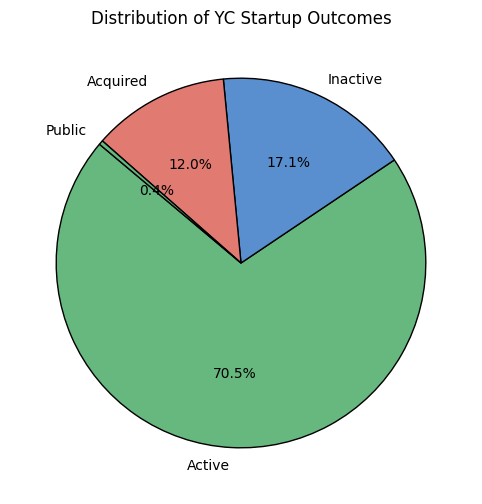

In [14]:
plt.figure(figsize=(8, 6))
colors = ["#67b87f", "#5a8fcf", "#e17a70"]  # Green for active, blue for acquired, red for closed
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black"},
)
plt.title("Distribution of YC Startup Outcomes")
plt.show()

In this section, we analysed the distribution of outcomes for YC (Y Combinator) startups based on their "status" field in the dataset. We began by loading the data, exploring the unique values in the "status" column, and calculating the count and percentage of each status category (Active, Acquired, and Closed). We then visualised this distribution using a pie chart, with green representing active startups, blue for acquired startups, and red for closed startups. The chart gives a clear overview of the proportion of startups in each outcome category, with the percentages displayed for each slice.

From the analysis, we can conclude that the YC startup outcomes are fairly distributed, and the pie chart offers a quick visual understanding of the overall status of the companies in the dataset.

# Question 2: How has the number of YC-funded startups evolved over time?

We analyse how the number of startups funded by Y Combinator has evolved over the years. Understanding this trend helps us identify periods of growth, stagnation, or decline in YC's startup investments. This can provide insights into how the accelerator's funding strategy has changed over time, how economic conditions might have influenced startup creation, and whether certain years saw a boom in new ventures.

2.1. We are checking for missing values and dropping rows where 'founded' year is missing

In [15]:
df["founded"].isnull().sum()

df_cleaned = df.dropna(subset=["founded"]).copy()

2.2. We are converting to integer in case the column is not numeric


In [16]:
df_cleaned["founded"] = df_cleaned["founded"].astype(int)

2.3. Counting startups per year


In [17]:
startup_counts = df_cleaned["founded"].value_counts().sort_index()

2.4. Converting to DataFrame for better visualization


In [18]:
startup_counts_df = pd.DataFrame({"Year": startup_counts.index, "Count": startup_counts.values})

2.5. Displaying first few rows

In [19]:
startup_counts_df.head()

,Year,Count
0,2005,4
1,2006,6
2,2007,9
3,2008,11
4,2009,13


2.6. We are setting figure size and style, plotting the trend of startups over time, adding title and labels

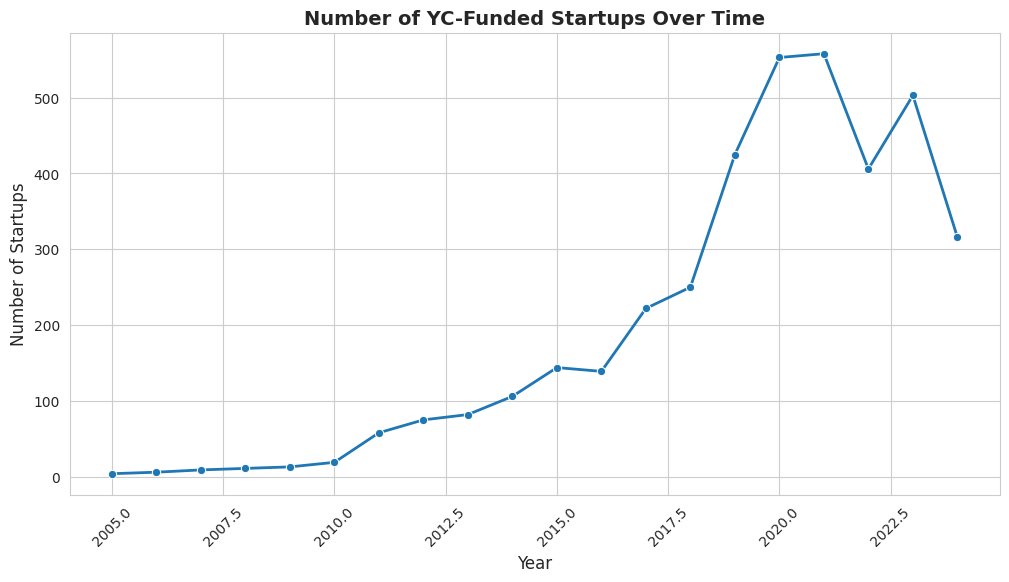

In [46]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(x=startup_counts_df["Year"], y=startup_counts_df["Count"], marker="o", color="#1f77b4", linewidth=2)

plt.title("Number of YC-Funded Startups Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Startups", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

We can conclude that the number of YC-funded startups has varied over the years, with noticeable increases in certain periods. The line plot effectively illustrates these trends, providing insight into the growth and fluctuations in YC startup funding.

# Question 3: Which industries are most common among YC startups?

We analyse which industries are most prevalent among YC-funded startups. Identifying dominant industries can help us understand YC’s investment focus over the years and how startup trends have evolved. This analysis is valuable for aspiring entrepreneurs looking to align their ideas with popular investment areas and for researchers studying the evolution of startup ecosystems.

To answer this question, we will:
*   Extract the industry column and count the number of startups in each category.
*   Identify the top 10 most common industries among YC startups.
*   Visualise the distribution using a bar chart to highlight the most dominant sectors.

3.1. We are checking for missing values, dropping rows where 'industry' is missing and standardizing industry names by stripping whitespace and making lowercase

In [47]:
missing_values = df["industry"].isnull().sum()
print(f"Missing values in 'industry' column: {missing_values}")

df_cleaned = df.dropna(subset=["industry"]).copy()

df_cleaned["industry"] = df_cleaned["industry"].str.strip().str.lower()

Missing values in 'industry' column: 0


3.2. Expanding industry categories for better classification

In [49]:
industry_categories = {
    "B2B": ["b2b"],
    "B2B Marketing": ["b2b, marketing"],
    "B2B Productivity": ["b2b, productivity"],
    "B2B Infrastructure": ["b2b, infrastructure"],
    "B2B Retail": ["b2b, retail"],
    "B2B Supply Chain & Logistics": ["b2b, supply chain and logistics"],
    "Engineering, Product & Design": ["b2b, engineering, product and design"],
    "Education": ["education"],
    "Fintech": ["fintech"],
    "Consumer, Home & Personal": ["consumer, home and personal"],
    "Healthcare & Biotech": ["healthcare", "biotech", "medtech", "healthtech"],
    "AI & Machine Learning": ["ai", "machine learning", "deep learning"],
    "E-commerce": ["e-commerce", "online retail"],
    "Cybersecurity": ["cybersecurity", "security"],
    "PropTech & Real Estate": ["proptech", "real estate"],
    "Gaming & Entertainment": ["gaming", "entertainment", "media"],
    "ClimateTech & Sustainability": ["climatetech", "sustainability", "renewable energy"],
    "Blockchain & Crypto": ["blockchain", "crypto", "web3", "decentralized finance"],
    "Transportation & Mobility": ["mobility", "transportation", "autonomous vehicles"],
    "Other Tech": ["software", "saas", "it", "cloud", "devtools"]
}

3.3. Creating a new column 'industry_category' by mapping industry names

In [50]:
def categorize_industry(industry):
    for category, keywords in industry_categories.items():
        for keyword in keywords:
            if keyword in industry:
                return category
    return "Other"

df_cleaned["industry_category"] = df_cleaned["industry"].apply(categorize_industry)

3.4. Aggregating startup counts per industry category, converting to DataFrame for visualization and displaying the first few rows

In [51]:
industry_agg_counts = df_cleaned["industry_category"].value_counts()

industry_agg_df = pd.DataFrame({"Industry Category": industry_agg_counts.index, "Count": industry_agg_counts.values})

print(industry_agg_df)

           Industry Category  Count
0                        B2B   2358
1                      Other   1012
2       Healthcare & Biotech    595
3                    Fintech    569
4                  Education    190
5     PropTech & Real Estate    134
6     Gaming & Entertainment     68
7  Transportation & Mobility     26
8                 Other Tech     21
9  Consumer, Home & Personal      1


3.5. Data visualisation

<ipython-input-52-420c320802fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_industry_agg["Industry Category"], x=top_industry_agg["Count"], palette="Blues_r")


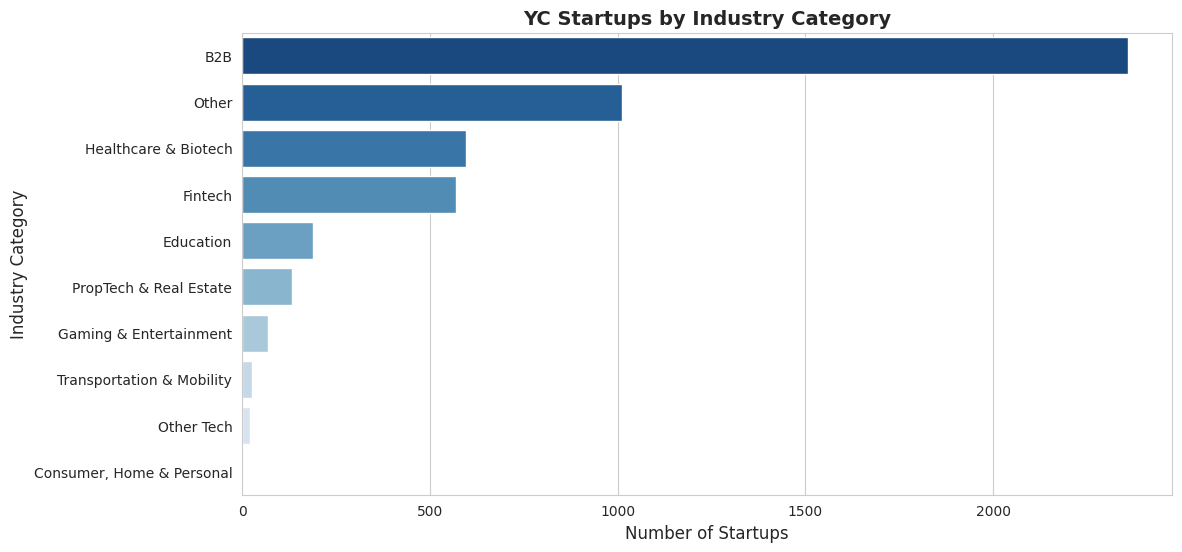

In [52]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

top_industry_agg = industry_agg_df.head(15)  # Displaying top 15 industries

sns.barplot(y=top_industry_agg["Industry Category"], x=top_industry_agg["Count"], palette="Blues_r")

plt.title("YC Startups by Industry Category", fontsize=14, fontweight="bold")
plt.xlabel("Number of Startups", fontsize=12)
plt.ylabel("Industry Category", fontsize=12)

plt.show()

3.6. Grouping by industry categories for deeper insights, sorting industries by total number of startups and displaying the industry groups

In [38]:
industry_grouped = df_cleaned.groupby("industry_category").agg(
    total_startups=("industry", "count")
).reset_index()

industry_grouped = industry_grouped.sort_values(by="total_startups", ascending=False)

print(industry_grouped)

           industry_category  total_startups
0                        B2B            2358
6                      Other            1012
5       Healthcare & Biotech             595
3                    Fintech             569
2                  Education             190
8     PropTech & Real Estate             134
4     Gaming & Entertainment              68
9  Transportation & Mobility              26
7                 Other Tech              21
1  Consumer, Home & Personal               1


3.7. Displaying startups classified as "Other"

In [53]:
other_startups = df_cleaned[df_cleaned["industry_category"] == "Other"]

unique_other_industries = other_startups["industry"].unique()

print("Industries classified as 'Other':")
print(unique_other_industries)

Industries classified as 'Other':
['industrials,aviation and space' 'government' 'consumer'
 'consumer,social' 'consumer,content' 'industrials,automotive'
 'industrials,manufacturing and robotics' 'industrials,drones'
 'industrials,climate' 'industrials,energy' 'industrials'
 'consumer,food and beverage' 'consumer,consumer electronics'
 'consumer,apparel and cosmetics' 'consumer,home and personal'
 'consumer,job and career services' 'industrials,agriculture'
 'consumer,travel, leisure and tourism' 'unspecified']


From the analysis, we can conclude that YC startups are predominantly concentrated in specific sectors, with a few emerging industries like AI & Machine Learning, Fintech, and E-commerce standing out. The "Other" category highlights some industry classifications that don't fit neatly into the predefined categories, offering insight into the diversity of startups in the dataset.

# Question 4: Do larger teams correlate with higher startup success?


We explore whether the size of a startup’s team has any correlation with its success. The assumption is that larger teams may have more resources, diverse skill sets, and better execution capabilities, potentially leading to higher chances of survival. Conversely, smaller teams might be more agile but may struggle with scaling and resource constraints.

To analyse this, we will:
*   Classify startups based on their success status (Active, Acquired, or Closed).
*   Compare average team sizes across these categories.
*   Visualise the relationship between team size and startup status using box plots and scatter plots.

4.1. In this section, we import two functions from `scipy.stats`:

**`spearmanr`**: Calculates the Spearman rank-order correlation, which measures the strength of a monotonic relationship between two variables.
   
**`f_oneway`**: Performs a one-way ANOVA test to check if there are significant differences between the means of three or more independent groups.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, f_oneway

4.2. Missing values in the "team_size" column are dropped, and the remaining values are converted to numeric. Then, a log transformation is applied to the "team_size" data using `np.log1p()` to normalize skewed data. This transformation helps make the distribution more symmetric.

In [55]:
df_cleaned = df.dropna(subset=["team_size"]).copy()
df_cleaned["team_size"] = pd.to_numeric(df_cleaned["team_size"], errors="coerce")

df_cleaned["log_team_size"] = np.log1p(df_cleaned["team_size"])

4.3. Numerical values are mapped to the "status" column using a dictionary (status_mapping), where each status (Inactive, Active, Acquired, Public) is assigned a corresponding numeric value. The mapped values are stored in a new column, "status_numeric."

In [56]:
status_mapping = {"Inactive": 0, "Active": 1, "Acquired": 2, "Public": 3}
df_cleaned["status_numeric"] = df_cleaned["status"].map(status_mapping)

4.4. The Spearman correlation between "log_team_size" and "status_numeric" is calculated and printed to assess the relationship between team size and startup success.

In [57]:
spearman_corr, _ = spearmanr(df_cleaned["log_team_size"], df_cleaned["status_numeric"])
print(f"Spearman Correlation between Log Team Size and Startup Success: {spearman_corr:.3f}")

Spearman Correlation between Log Team Size and Startup Success: 0.261


A Spearman correlation of 0.261 between log-transformed team size and startup success indicates a weak positive monotonic relationship. This means that, as the team size increases, there is a slight tendency for startups to be more successful (as represented by the "status_numeric" column). However, the correlation is relatively low, so the relationship is not very strong, and other factors may be influencing startup success.

4.5. A one-way ANOVA test is performed to compare the "team_size" across four different startup statuses (Active, Inactive, Acquired, and Public). The ANOVA tests if there are significant differences in team size between these groups. The p-value is printed to determine whether to reject the null hypothesis (that the means of all groups are equal). ANOVA is used because it allows comparing means across multiple groups simultaneously.

In [ ]:
anova_results = f_oneway(
    df_cleaned[df_cleaned["status"] == "Active"]["team_size"],
    df_cleaned[df_cleaned["status"] == "Inactive"]["team_size"],
    df_cleaned[df_cleaned["status"] == "Acquired"]["team_size"],
    df_cleaned[df_cleaned["status"] == "Public"]["team_size"]
)
print(f"ANOVA p-value: {anova_results.pvalue:.5f}")

4.6. This code creates a combined violin plot and boxplot to show the distribution of log-transformed team sizes across different startup statuses (Active, Inactive, Acquired, Public). The violin plot displays the overall distribution and density of the data, while the boxplot highlights the median, quartiles, and potential outliers. The log scale is used for team size to normalize the data. The plot helps to visually compare how team size varies across startup statuses.

<ipython-input-58-f6ea2fbc4a16>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="status", y="log_team_size", data=df_cleaned, inner="quartile", palette="muted", alpha=0.7)


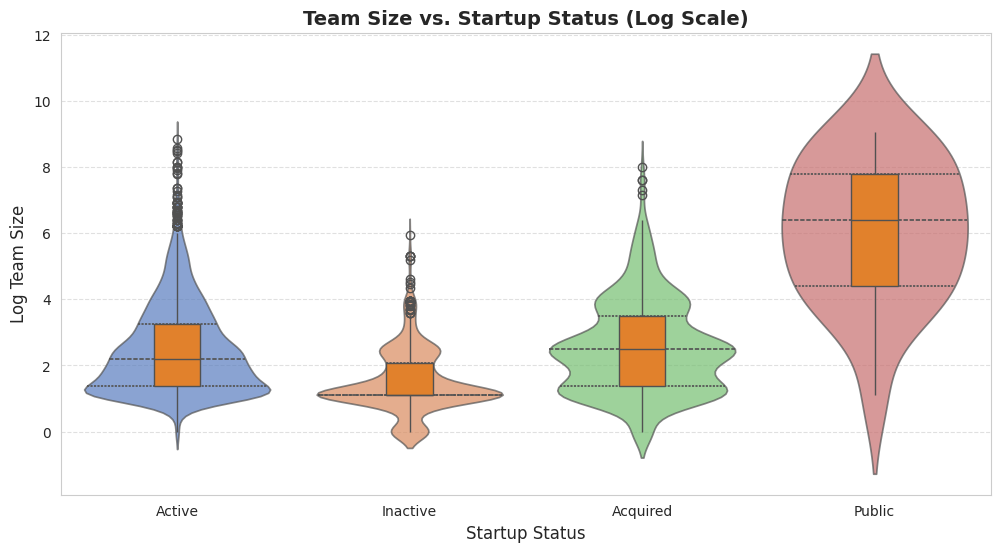

In [58]:
plt.figure(figsize=(12, 6))

sns.violinplot(x="status", y="log_team_size", data=df_cleaned, inner="quartile", palette="muted", alpha=0.7)
sns.boxplot(x="status", y="log_team_size", data=df_cleaned, width=0.2, boxprops={'zorder': 2}, showcaps=False)

plt.title("Team Size vs. Startup Status (Log Scale)", fontsize=14, fontweight="bold")
plt.xlabel("Startup Status", fontsize=12)
plt.ylabel("Log Team Size", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

The Spearman correlation coefficient of 0.261 indicates a weak positive monotonic relationship, suggesting that larger team sizes are slightly associated with higher startup success. However, the correlation is not strong, implying that other factors likely contribute more significantly to startup outcomes. Additionally, the box and violin plots provided a visual comparison of team size distributions across different startup statuses, further supporting the conclusion that team size varies across statuses but with overlapping distributions.

# Question 5: Where are most YC startups headquartered?


Understanding the geographic distribution of Y Combinator (YC) startups provides insights into the most popular tech hubs and innovation centers worldwide. Certain locations, such as Silicon Valley, have historically attracted a high number of startups due to access to investors, talent, and infrastructure.

5.1.1. The code checks for missing values in the "location" column and fills them with "Unknown." Then, it counts the occurrences of each location and displays the top 10 most frequent locations.

In [59]:
df["location"].isnull().sum()

df["location"] = df["location"].fillna("Unknown")

location_counts = df["location"].value_counts()

location_counts.head(10)

top_locations = location_counts.head(10)

5.1.2. This code creates a bar plot to display the top 10 YC startup headquarters based on the number of startups in each location. The x-axis represents the number of startups, and the y-axis shows the locations. The plot uses the "viridis" color palette and is designed with a white grid style for better readability. The title and axis labels provide context for the visual representation of the data.

<ipython-input-60-e4d4a8081d02>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")


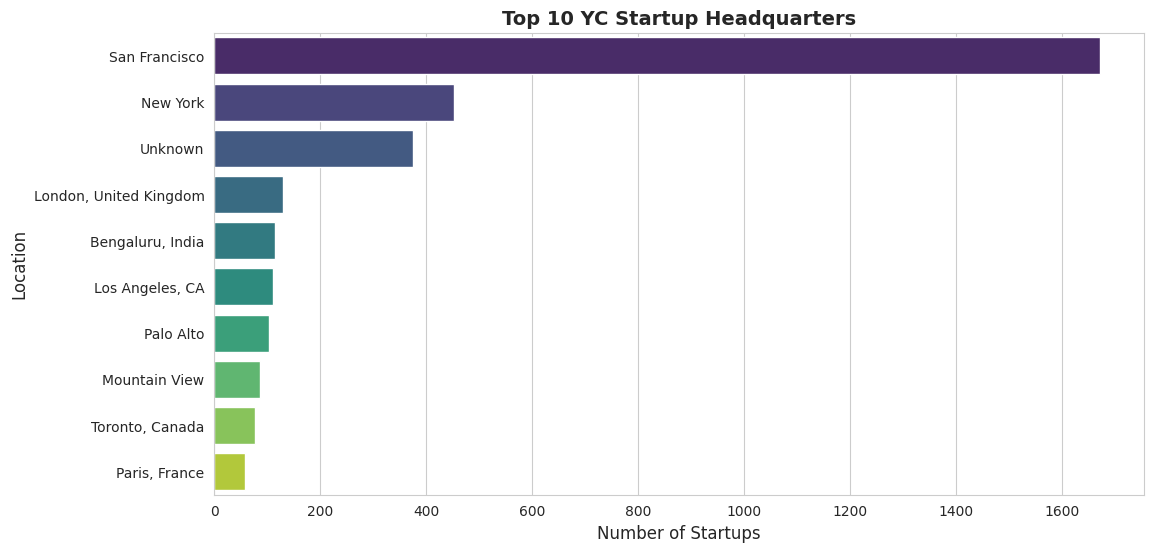

In [60]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")

plt.title("Top 10 YC Startup Headquarters", fontsize=14, fontweight="bold")
plt.xlabel("Number of Startups", fontsize=12)
plt.ylabel("Location", fontsize=12)

plt.show()

We handled missing values in the "location" column by filling them with "Unknown." We then identified the top 10 locations with the most YC startups and visualized this data using a bar plot. The plot highlights the most common startup headquarters, providing insights into the geographical distribution of YC startups.

5.2.1. This line removes any leading or trailing whitespace from the column names in the DataFrame.

In [62]:
df.columns = df.columns.str.strip()

5.2.2. This code checks if the required columns ('location' and 'founded') exist in the dataset. If they do, it proceeds with the following steps:

1. Drops rows where 'location' or 'founded' is missing.
2. Converts the 'founded' column to integers.
3. Identifies the top 5 most common startup locations.
4. Filters the dataset to include only startups from these top locations.
5. Groups the data by 'founded' year and 'location', counting the number of startups in each group.
6. Plots a line chart to visualize the growth of YC startups in the top 5 locations over time, with each location represented by a different line.

The plot shows the number of startups founded each year in the top 5 locations, highlighting growth trends across locations.

<ipython-input-64-b59dd0bbbe30>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['founded'] = df_clean['founded'].astype(int)


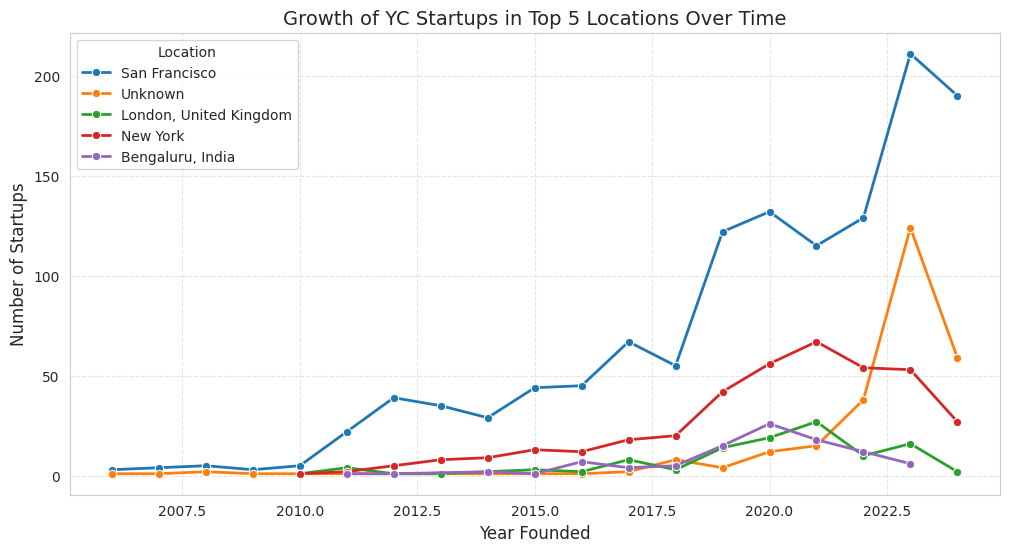

In [64]:
required_columns = {'location', 'founded'}
if not required_columns.issubset(df.columns):
    print(f"Missing columns: {required_columns - set(df.columns)}")
else:
    df_clean = df.dropna(subset=['location', 'founded'])

    df_clean['founded'] = df_clean['founded'].astype(int)

    top_5_locations = df_clean['location'].value_counts().head(5).index

    df_top_locations = df_clean[df_clean['location'].isin(top_5_locations)]

    location_growth = df_top_locations.groupby(['founded', 'location']).size().reset_index(name='count')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=location_growth, x='founded', y='count', hue='location', marker='o', linewidth=2)

    plt.title("Growth of YC Startups in Top 5 Locations Over Time", fontsize=14)
    plt.xlabel("Year Founded", fontsize=12)
    plt.ylabel("Number of Startups", fontsize=12)
    plt.legend(title="Location")
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

We cleaned the data by ensuring the required columns ("location" and "founded") were present and removing missing values. We focused on the top 5 locations with the most YC startups and analyzed their growth over time. The line plot shows the number of startups founded each year in these locations, revealing trends in startup growth across different regions.

# Conclusion

This project provided a comprehensive analysis of YC-funded startups, examining key aspects such as their survival rates, industry distribution, geographic concentration, and growth trends over time. Through data-driven insights and visualizations, we explored the factors that contribute to startup success or failure, including the role of team size and the evolving landscape of startup ecosystems.  

Our findings revealed several important trends:  
- A significant percentage of YC startups remain active, while others either shut down or get acquired, highlighting the competitive nature of the startup ecosystem.  
- The number of YC-funded startups has grown over the years, reflecting the increasing influence of Y Combinator in the tech industry.  
- Certain industries consistently receive more YC funding, but there are noticeable shifts over time, indicating changing market demands and investment trends.  
- Larger teams may have an impact on startup success, but further research is needed to establish a definitive correlation.  
- The majority of YC startups are headquartered in a few key locations, emphasizing the importance of startup hubs like Silicon Valley.  

By conducting this analysis, we gained valuable insights into the startup landscape and the factors influencing a startup’s trajectory. These findings can help entrepreneurs, investors, and policymakers make more informed decisions. Future research can build on this work by incorporating additional datasets, exploring deeper causal relationships, and applying predictive modeling to anticipate startup success.  

This project serves as a foundation for understanding the dynamics of YC-backed startups and can be expanded further to analyse broader startup ecosystems.